In [3]:
from collections import namedtuple
import requests
import pandas as pd
import numpy as np
import pickle
import finnhub
from datetime import date, datetime, timedelta
from utils import get_config, get_credentials
import logging
print(get_credentials())

{'finnhub': 'c2d0ksiad3ibl1b87ub0', 'financialmodelingprep': 'e0ed6052477ed6f2212a4fe50b5ac6c0', 'marketstack': 'c4a91bad585fb5b8b45ebb1a98c32378'}


In [2]:
API.get_earnings_events('EHC', 10)

[Earnings(date='2021-10-27', estimate=1.06, actual=1.03, surprise=-0.03, surprise_pct=-2.8302),
 Earnings(date='2021-07-27', estimate=1.01, actual=1.17, surprise=0.16, surprise_pct=15.8416),
 Earnings(date='2021-04-27', estimate=0.82, actual=1.05, surprise=0.23, surprise_pct=28.0488),
 Earnings(date='2021-01-26', estimate=0.86, actual=0.93, surprise=0.07, surprise_pct=8.1395),
 Earnings(date='2020-10-28', estimate=0.74, actual=0.78, surprise=0.04, surprise_pct=5.4054),
 Earnings(date='2020-07-27', estimate=0.39, actual=0.31, surprise=-0.08, surprise_pct=-20.5128),
 Earnings(date='2020-04-28', estimate=0.85, actual=0.87, surprise=0.02, surprise_pct=2.3529),
 Earnings(date='2020-02-06', estimate=0.85, actual=0.85, surprise=0.0, surprise_pct=0.0),
 Earnings(date='2019-10-28', estimate=0.89, actual=0.93, surprise=0.04, surprise_pct=4.4944),
 Earnings(date='2019-07-29', estimate=0.97, actual=1.08, surprise=0.11, surprise_pct=11.3402)]

In [45]:
from Screener import Screener

symbols = Screener.screen()

In [46]:
"UA" in symbols

True

In [1]:
from API import API, Profile, Earnings
from Metrics import Metrics
from Charting import chart
def res_chart(symbol, dt):
    d = API.get_historical_ohlc(symbol)
    d['rsi'] = Metrics.get_rsi(d['close'], 21)
    d = d[21:]
    d['norm_rsi'] = Metrics.normalize(d['rsi'])
    chart(d, col="norm_rsi", dt=dt)

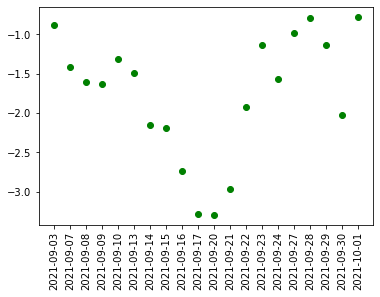

In [38]:
res_chart("MLM", "2021-09-21")

In [20]:
import pandas as pd
a = pd.DataFrame({"symbol":[], "date":[], "5-day":[], "10-day":[], "15-day":[], "20-day":[]})
a = a.append(pd.DataFrame({"symbol":[1], "date":[1], "5-day":[1], "10-day":[1], "15-day":[1], "20-day":[1]}), ignore_index=True)
a = a.append(pd.DataFrame({"symbol":[2], "date":[1], "5-day":[1], "10-day":[1], "15-day":[1], "20-day":[1]}), ignore_index=True)
a = a.append(pd.DataFrame({"symbol":[3], "date":[1], "5-day":[1], "10-day":[1], "15-day":[1], "20-day":[1]}), ignore_index=True)
a = a.append(pd.DataFrame({"symbol":[4], "date":[1], "5-day":[1], "10-day":[1], "15-day":[1], "20-day":[1]}), ignore_index=True)
a = a.append(pd.DataFrame({"symbol":[5], "date":[1], "5-day":[1], "10-day":[1], "15-day":[1], "20-day":[1]}), ignore_index=True)
a

,symbol,date,5-day,10-day,15-day,20-day
0,1.0,1.0,1.0,1.0,1.0,1.0
1,2.0,1.0,1.0,1.0,1.0,1.0
2,3.0,1.0,1.0,1.0,1.0,1.0
3,4.0,1.0,1.0,1.0,1.0,1.0
4,5.0,1.0,1.0,1.0,1.0,1.0


In [61]:
import pickle
with open("signals_open_beta2_div_2.pd", 'rb') as f:
    signals = pickle.load(f)
signals['b10'] = signals['90-day'] - signals['10-day']
signals['b20'] = signals['90-day'] - signals['20-day']
signals['b30'] = signals['90-day'] - signals['30-day']
signals.set_index('date')

,symbol,5-day,10-day,20-day,30-day,40-day,50-day,60-day,90-day,b10,b20,b30
date,,,,,,,,,,,,
2021-02-04,AAT,6.24,2.73,21.32,18.34,13.96,17.95,23.32,34.99,32.26,13.67,16.65
2021-07-09,ABTX,-4.02,-5.28,2.14,0.54,-2.87,-4.26,4.21,15.52,20.80,13.38,14.98
2021-06-22,ACM,3.33,2.00,0.94,-0.57,2.76,6.54,7.20,12.15,10.15,11.21,12.72
2021-07-21,ACM,1.50,-1.50,1.80,5.54,6.20,1.74,1.93,16.19,17.69,14.39,10.65
2021-06-22,ADM,-1.69,-2.82,-5.74,-4.69,-1.20,-3.21,2.21,5.19,8.01,10.93,9.88
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-08,WTRG,5.39,1.85,9.42,14.64,12.46,10.86,13.08,14.19,12.34,4.77,-0.45
2021-08-23,XOM,0.46,-0.66,-2.31,12.22,15.64,18.05,18.41,10.71,11.37,13.02,-1.51
2021-06-22,ZION,-0.23,-2.86,-2.23,-1.12,1.55,8.24,9.24,19.03,21.89,21.26,20.15


In [59]:
signals.columns

Index(['symbol', 'date', '5-day', '10-day', '20-day', '30-day', '40-day',
       '50-day', '60-day', '90-day', 'b10', 'b20', 'b30'],
      dtype='object')

In [60]:
for c in ['5-day', '10-day', '20-day', '30-day', '40-day', '50-day', '60-day', '90-day', 'b10', 'b20', 'b30']:
    print(f"mean gain for {c}: {signals[c].mean()}, stdev: {signals[c].std()}")

mean gain for 5-day: 0.9009302325581394, stdev: 3.2660568788631954
mean gain for 10-day: 1.2308139534883722, stdev: 4.7865206850857716
mean gain for 20-day: 2.7099224806201545, stdev: 6.342354139047722
mean gain for 30-day: 4.596434108527132, stdev: 7.774604102268056
mean gain for 40-day: 6.02422480620155, stdev: 8.099114015762224
mean gain for 50-day: 6.892829457364342, stdev: 9.845708586289398
mean gain for 60-day: 8.958217054263566, stdev: 11.432745682972959
mean gain for 90-day: 12.016046511627907, stdev: 15.085402969516329
mean gain for b10: 10.785232558139535, stdev: 14.504343564650766
mean gain for b20: 9.306124031007752, stdev: 12.349708691413193
mean gain for b30: 7.419612403100775, stdev: 11.3714107624587


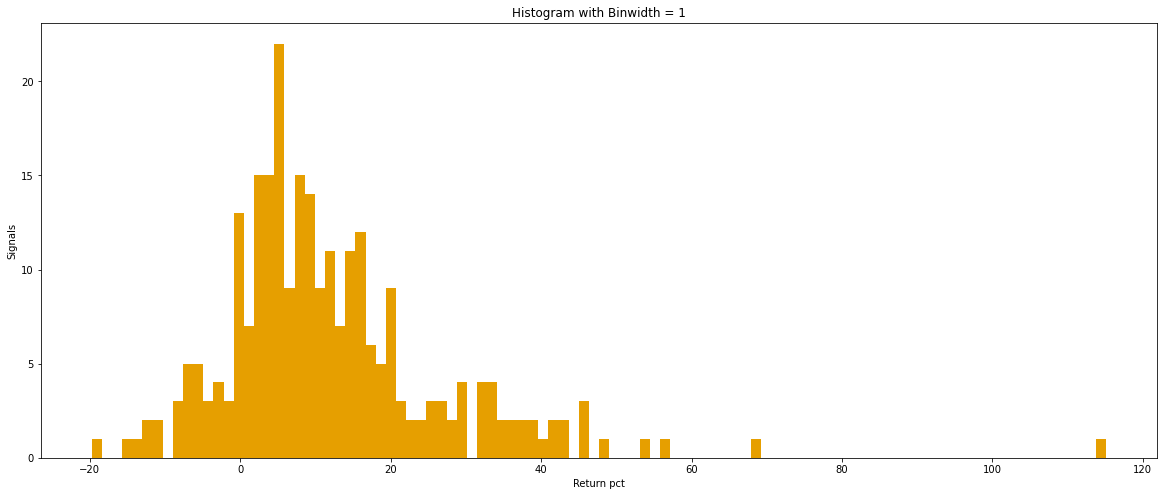

In [87]:
import matplotlib.pyplot as plt
x = signals.index
y = signals['90-day']

for i, binwidth in enumerate([1]):
    f=plt.figure()
    f.set_figwidth(20)
    f.set_figheight(8)

    # Set up the plot
    ax = plt.subplot(1, 1, i + 1)
    
    # Draw the plot
    ax.hist(y, bins = int(100/binwidth),
             color = '#E69F00')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth)
    ax.set_xlabel('Return pct')
    ax.set_ylabel('Signals')



plt.show()

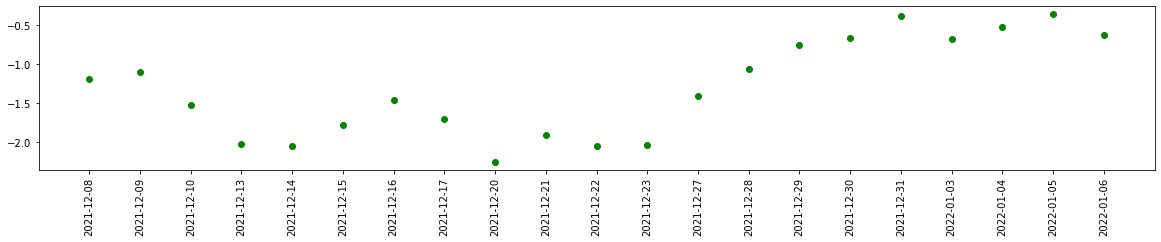

In [100]:
d = API.get_historical_ohlc("gef")
d['rsi'] = Metrics.get_rsi(d['close'], 21)
d = d[21:]
d['norm_rsi'] = Metrics.normalize(d['rsi'])
chart(d, col="norm_rsi")

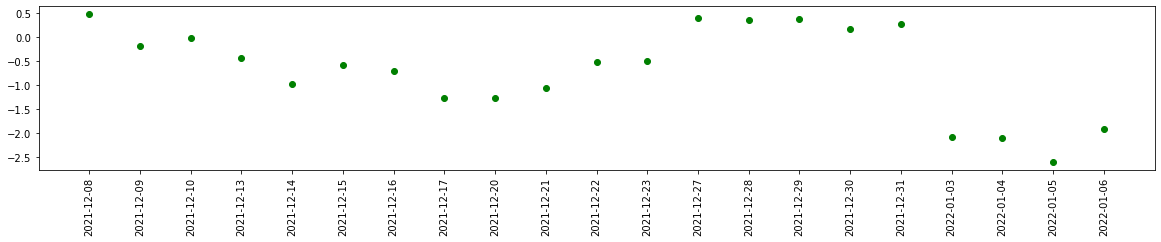

In [92]:
chart(d, col="norm_rsi")

In [51]:
x = d['rsi']
( x - x.mean() ) / x.std()

date
2020-01-02         NaN
2020-01-03    2.803308
2020-01-06    2.803308
2020-01-07    1.658963
2020-01-08    2.317048
                ...   
2021-12-17   -0.262950
2021-12-20   -0.232649
2021-12-21   -0.361190
2021-12-22   -0.206136
2021-12-23   -0.179594
Name: rsi, Length: 500, dtype: float64

In [45]:
any(d[-5:].rsi.values < 40)

False

In [109]:
import smtplib, ssl
from email.message import EmailMessage

port = 465  # For SSL
password = "ztycurkjzkvxlynb"

# Create a secure SSL context
context = ssl.create_default_context()
me = "faysalkhatri@gmail.com"
with smtplib.SMTP_SSL("smtp.gmail.com", port, context=context) as server:
    server.login(me, password)
    # TODO: Send email here
    msg = EmailMessage()
    msg['Subject'] = f'happy Birthday.'
    msg['To'] = me
    msg.set_content("""\
    Salut!

    Cela ressemble à un excellent recipie[1] déjeuner.

    [1] http://www.yummly.com/recipe/Roasted-Asparagus-Epicurious-203718

    --Pepé
    """)

    server.send_message(msg)
    server.quit()

In [ ]:
# Import smtplib for the actual sending function
import smtplib

# Import the email modules we'll need
from email.message import EmailMessage

# Open the plain text file whose name is in textfile for reading.
with open(textfile) as fp:
    # Create a text/plain message
    msg = EmailMessage()
    msg.set_content(fp.read())

# me == the sender's email address
# you == the recipient's email address
msg['Subject'] = f'The contents of {textfile}'
msg['From'] = me
msg['To'] = you

# Send the message via our own SMTP server.
s = smtplib.SMTP('localhost')
s.send_message(msg)
s.quit()

In [5]:
from API import API

print(API.get_profile_string("BX"))

Blackstone Inc. (BX)
Financial Services, Asset Management

Market Cap: $86.23B
Dividend Yield: 2.94%
Average Volume: 3835790
Beta: 1.346173
IPO Date: 2007-06-22

Upcoming and Recent EPS:
date		est	act	surp	surp %
2022-01-27	1.31	nan	nan	nan
2021-10-21	0.91	1.28	0.37	40.7
2021-07-22	0.8	0.82	0.02	2.5
2021-04-22	0.76	0.96	0.2	26.3

https://www.blackstone.com
Blackstone (China) Equity Investment Fund specializes in growth investments in alternative energy, environmental, and medical sectors. The fund prefers to invest in China primarily in Beijing, Hong Kong, and Shangai with a focus on the Pudong Area. Blackstone Inc. is an alternative asset management firm specializing in real estate, private equity, hedge fund solutions, credit, secondary funds of funds, public debt and equity and multi-asset class strategies. The firm typically invests in early-stage companies. It also provide capital markets services. The real estate segment specializes in opportunistic, core+ investments as well as 

In [6]:
import pickle

x = [['BX', 'FTNT'],
     ['BR', 'BX', 'CBOE', 'CNXC', 'GOOG', 'GOOGL', 'HUM', 'LSI', 'MCO', 'NOVT', 'TXN'],
     [],
     [],
     []
    ]

with open(f"../data/last_signals.pickle", 'wb') as f:
            pickle.dump(x, f, protocol=pickle.HIGHEST_PROTOCOL)

In [10]:
with open(f"../data/last_signals.pickle", 'rb') as f:
    _x = pickle.load(f)
    print(_x)

[['BX', 'FTNT'], ['BR', 'BX', 'CBOE', 'CNXC', 'GOOG', 'GOOGL', 'HUM', 'LSI', 'MCO', 'NOVT', 'TXN'], [], [], []]


In [11]:
y = []
for i in _x:
    y.extend(i)
    
print(y)

['BX', 'FTNT', 'BR', 'BX', 'CBOE', 'CNXC', 'GOOG', 'GOOGL', 'HUM', 'LSI', 'MCO', 'NOVT', 'TXN']
